In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and merging the datasets

In [2]:
attempt_to_rape = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Attempt-to-Rape_2014-2021.csv")
rape_commited_suicide = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Rape_CommittedSuicideAfterBeingRaped_2007-2021.csv")
gang_rape = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Rape_GangRape_2007-2021.csv")
killed_after_rape = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Rape_KilledAfterRape_2007-2021.csv")
rape_total = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Rape_Total_2001-2021.csv")

In [3]:
dowry = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Dowry_2001-2021.csv")
stalking = pd.read_csv("../input/woman-harassment-dataset-200121-bangladesh/Stalking_2011-2021.csv")

In [4]:
rape_dataset = pd.DataFrame(np.array(rape_commited_suicide.Years), columns = ["years"])
rape_dataset["total_rcs"], rape_dataset["total_gr"], rape_dataset["total_kar"] = rape_commited_suicide.Total_victims, gang_rape.Total_victims, killed_after_rape.Total_victims
rape_dataset["children_rcs"], rape_dataset["children_gr"], rape_dataset["children_kar"] = rape_commited_suicide.children, gang_rape.children, killed_after_rape.children
rape_dataset["women_rcs"], rape_dataset["women_gr"], rape_dataset["women_kar"] = rape_commited_suicide.women, gang_rape.women, killed_after_rape.women
rape_dataset["unidentified_age_rcs"], rape_dataset["unidentified_age_gr"], rape_dataset["unidentified_age_kar"] = rape_commited_suicide.Unidentified_age, gang_rape.Unidentified_age, killed_after_rape.Unidentified_age

In [5]:
rape_dataset.head(3) #merged rape_commited_suicide, gang_rape and killed_after_rape

,years,total_rcs,total_gr,total_kar,children_rcs,children_gr,children_kar,women_rcs,women_gr,women_kar,unidentified_age_rcs,unidentified_age_gr,unidentified_age_kar
0,2021,8,283,43,8,121,23,0,154,20,0,8,0
1,2020,8,345,49,7,154,23,1,182,25,0,9,1
2,2019,7,294,42,5,137,32,2,150,10,0,7,0


In [6]:
attempt_to_rape.shape, rape_total.shape

((8, 2), (21, 5))

In [7]:
dowry.head(3)

,Years,Killed,Physically_abused,Suicide,Total
0,2021,72,118,7,197
1,2020,89,106,4,199
2,2019,48,55,0,103


In [8]:
stalking.head(3)

,year,victims,protesting_female_attacked,protesting_male_attacked
0,2021,113,10,39
1,2020,157,26,3
2,2019,189,11,28


# Exploratory Data Analysis

## Number of attempts to rape (2014 - 2021)

<AxesSubplot:xlabel='year', ylabel='number'>

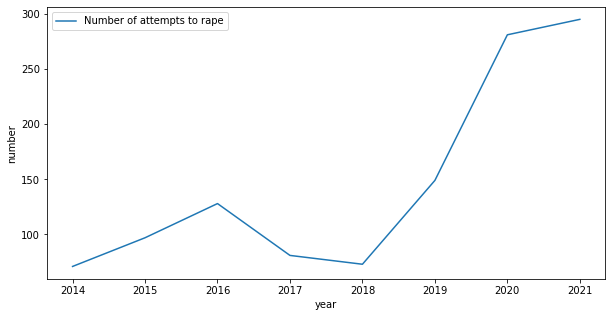

In [10]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = attempt_to_rape, x = "year", y = "number", label = "Number of attempts to rape")
#you can see a sharp increase from 2018 to 2021

## Are children tend to be more abused?

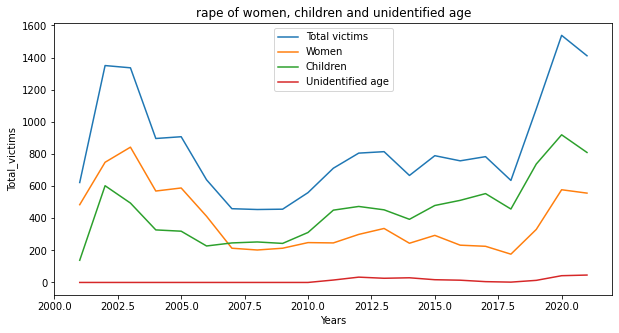

In [11]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = rape_total, x = "Years", y = "Total_victims", label = "Total victims")
sns.lineplot(data = rape_total, x = "Years", y = "women", label = "Women")
sns.lineplot(data = rape_total, x = "Years", y = "children", label = "Children")
sns.lineplot(data = rape_total, x = "Years", y = "Unidentified_age", label = "Unidentified age")
plt.title("rape of women, children and unidentified age")
plt.show()

**It can be clearly seen that number of rape incidents are sharply increasing from 2018 to 2021. Around 2007 to 2009, rape incidents were the lowest in this 20 years time bound (2001 to 2021). Also from 2006, children are tend to be more abused than women. You can see the curve is at a bit upper than the women's curve.**

## Are children often killed after rape and commits suicide than women?

<AxesSubplot:title={'center':'Number of womens raped and raped then killed'}, xlabel='years'>

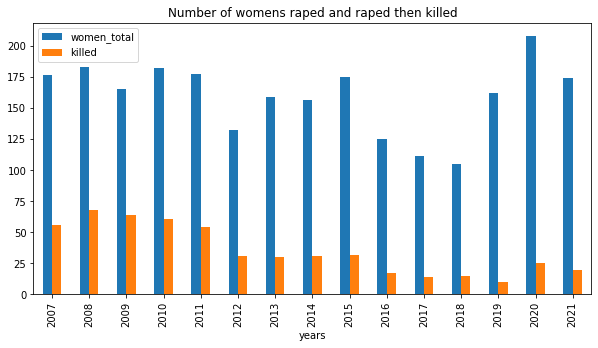

In [12]:
women_total = rape_dataset.women_rcs + rape_dataset.women_gr + rape_dataset.women_kar
women_killed = rape_dataset.women_kar
women_suicide = rape_dataset.women_rcs
raped_vs_killed = pd.DataFrame({"women_total": np.array(women_total), "killed": np.array(women_killed)}, index = rape_dataset.years)
raped_vs_suicide = pd.DataFrame({"women_total": np.array(women_total), "suicide": np.array(women_suicide)}, index = rape_dataset.years)
raped_vs_killed.sort_index().plot.bar(figsize = (10, 5), title = "Number of womens raped and raped then killed")

<AxesSubplot:title={'center':'Number of women raped and raped then commited suicide'}, xlabel='years'>

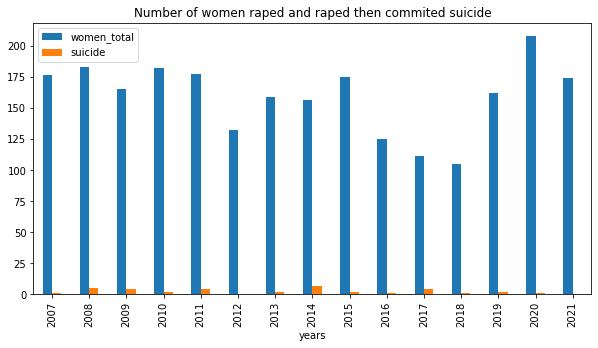

In [13]:
raped_vs_suicide.sort_index().plot.bar(figsize = (10, 5), title = "Number of women raped and raped then commited suicide")

<AxesSubplot:title={'center':'Number of children raped and raped then killed'}, xlabel='years'>

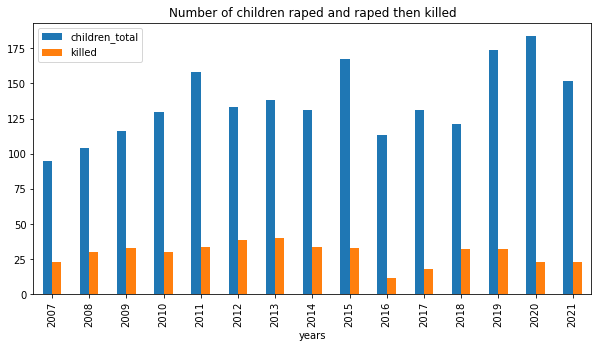

In [15]:
children_total = rape_dataset.children_rcs + rape_dataset.children_gr + rape_dataset.children_kar
children_killed = rape_dataset.children_kar
children_suicide = rape_dataset.children_rcs
raped_vs_killed = pd.DataFrame({"children_total": np.array(children_total), "killed": np.array(children_killed)}, index = rape_dataset.years)
raped_vs_suicide = pd.DataFrame({"children_total": np.array(children_total), "suicide": np.array(children_suicide)}, index = rape_dataset.years)
raped_vs_killed.sort_index().plot.bar(figsize = (10, 5), title = "Number of children raped and raped then killed")

<AxesSubplot:title={'center':'Number of children raped and raped then commited suicide'}, xlabel='years'>

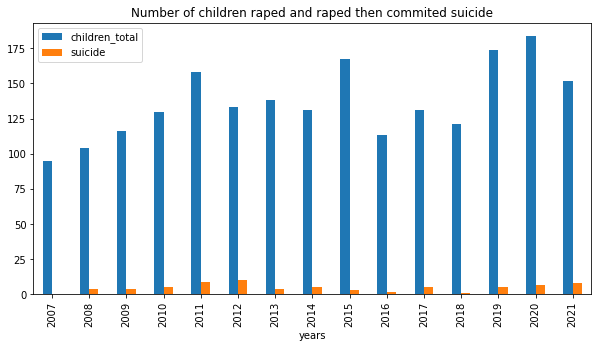

In [16]:
raped_vs_suicide.sort_index().plot.bar(figsize = (10, 5), title = "Number of children raped and raped then commited suicide")

**Though seemingly there's a little or no difference but if you look more closely, it seems that at least in recent years children are tend to be killed and commiting suicide than women.**

## Killing, Abusing and Suicides related to dowry 

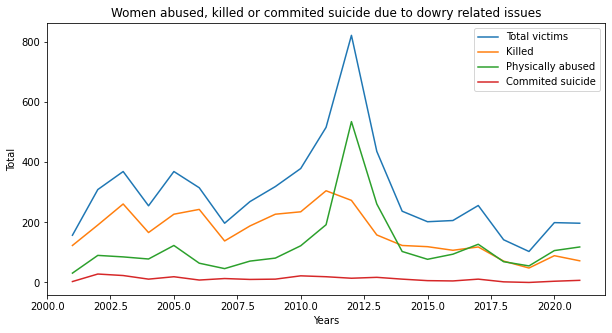

In [17]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = dowry, x = "Years", y = "Total", label = "Total victims")
sns.lineplot(data = dowry, x = "Years", y = "Killed", label = "Killed")
sns.lineplot(data = dowry, x = "Years", y = "Physically_abused", label = "Physically abused")
sns.lineplot(data = dowry, x = "Years", y = "Suicide", label = "Commited suicide")
plt.title("Women abused, killed or commited suicide due to dowry related issues")
plt.show()

**Though there's no significant increase or decrease in the curve, killing related to dowry seems to be decreasing. Physical abuse tends to follow a straight line but there's a spike around 2012. Since killing followed by dowry is decreasing, the total number of victims also decreases a little as seen in the curve.**

## Are women abused by dowry related issues more often killed or commit suicide?

<AxesSubplot:title={'center':'Women abused due to dowry and either commited suicide or killed'}, xlabel='Years'>

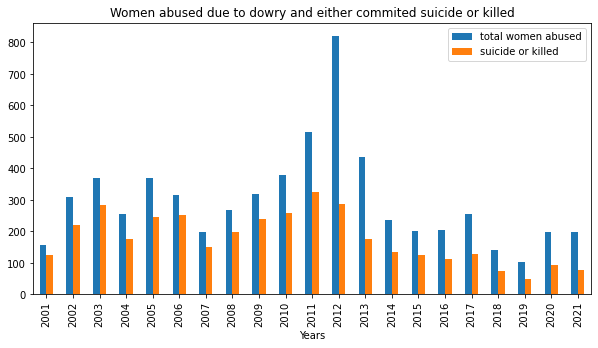

In [19]:
total = dowry.Total
killed_or_suicide = dowry.Killed + dowry.Suicide
abused_and_died = pd.DataFrame({"total women abused": np.array(total), "suicide or killed": np.array(killed_or_suicide)}, index = dowry.Years)
abused_and_died.sort_index().plot.bar(figsize = (10, 5), title = "Women abused due to dowry and either commited suicide or killed")

**Shockingly, around half or more of the women abused by their family due to dowry related issues are either killed or commit suicide.**

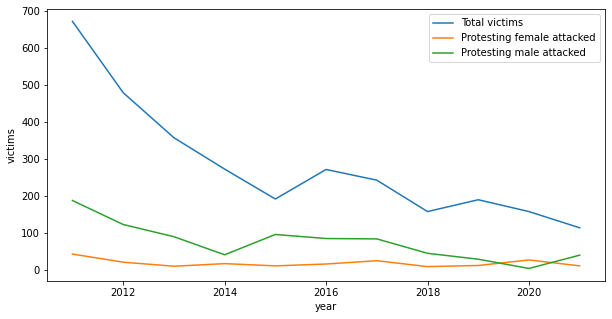

In [21]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = stalking, x = "year", y = "victims", label = "Total victims")
sns.lineplot(data = stalking, x = "year", y = "protesting_female_attacked", label = "Protesting female attacked")
sns.lineplot(data = stalking, x = "year", y = "protesting_male_attacked", label = "Protesting male attacked")
plt.show()